In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import os #access operating system
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
filepath = 'SDSS17.csv'

In [6]:
df = pd.read_csv(filepath)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842



    obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
    alpha = Right Ascension angle (at J2000 epoch)
    delta = Declination angle (at J2000 epoch)
    u = Ultraviolet filter in the photometric system
    g = Green filter in the photometric system
    r = Red filter in the photometric system
    i = Near Infrared filter in the photometric system
    z = Infrared filter in the photometric system
    run_ID = Run Number used to identify the specific scan
    rereun_ID = Rerun Number to specify how the image was processed
    cam_col = Camera column to identify the scanline within the run
    field_ID = Field number to identify each field
    spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
    class = object class (galaxy, star or quasar object)
    redshift = redshift value based on the increase in wavelength
    plate = plate ID, identifies each plate in SDSS
    MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
    fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
for i in df:
    print(df.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
obj_ID         0
alpha          0
delta    

In [9]:
df['class'].nunique()

3

In [10]:
dfs = df.copy()

In [11]:
ds = df.copy()

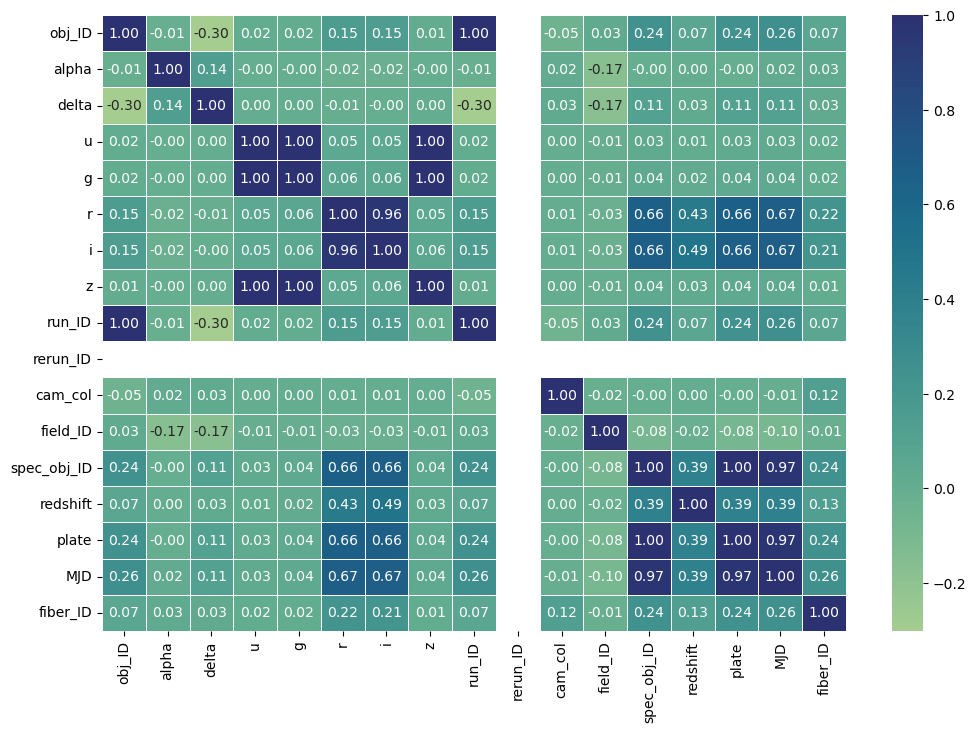

<Figure size 640x480 with 0 Axes>

In [12]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(ds.corr(), cmap="crest", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

plt.savefig("heatmap_sloan.png")

In [13]:
dfs = dfs.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID','plate','spec_obj_ID'], axis = 1)

In [14]:
dfs.head(20)

,u,g,r,i,z,class,redshift,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,56187
5,23.48827,23.33776,21.32195,20.25615,19.54544,QSO,1.424659,55855
6,21.46973,21.17624,20.92829,20.60826,20.42573,QSO,0.586455,58456
7,22.24979,22.02172,20.34126,19.48794,18.84999,GALAXY,0.477009,56210
8,24.40286,22.35669,20.61032,19.46490,18.95852,GALAXY,0.660012,56386
9,21.74669,20.03493,19.17553,18.81823,18.65422,STAR,-0.000008,54082


In [14]:
#dfs = dfs.drop(['plate','spec_obj_ID'], axis = 1)

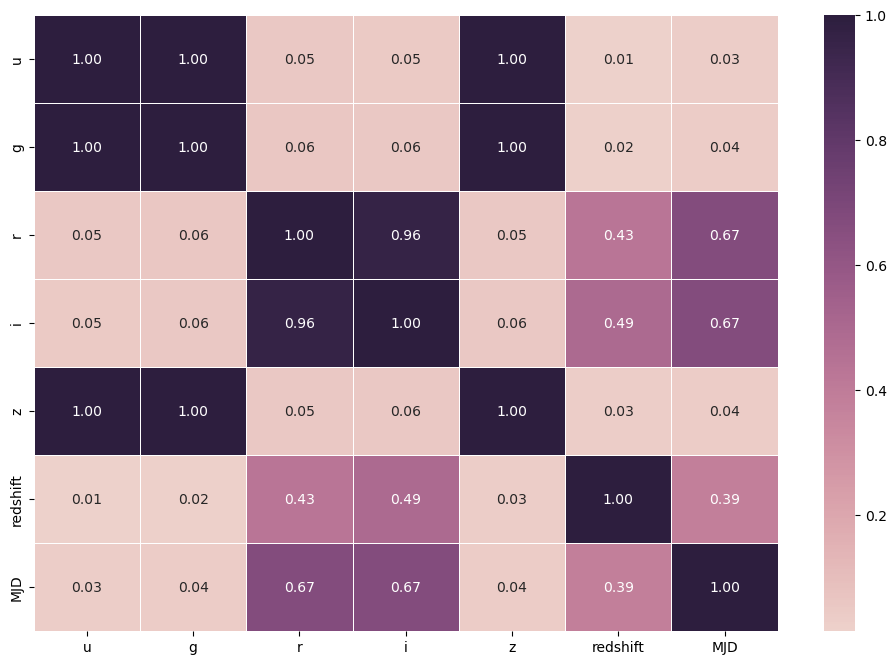

In [15]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dfs.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()



In [48]:
dim_stellar = dfs.copy()

In [49]:
#dim_stellar = dim_stellar.drop(['class'], axis = 1)

In [50]:
dim_stellar.head()

,u,g,r,i,z,class,redshift,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,56187


In [61]:
dim_stellar = dim_stellar.rename(columns={'u':'Ultraviolet Filter', 'r':'Red Filter', 'g': 'Green Filter', 
                                  'i': 'Near Infrared Filter', 'z':'Infrared FIlter', 'class':'Class'})

In [62]:
dim_stellar.head()

,Ultraviolet Filter,Green Filter,Red Filter,Near Infrared Filter,Infrared FIlter,Class,redshift,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,56187


In [63]:
dim_stellar = dim_stellar.rename(columns={'redshift':'Redshift'})

In [64]:
dim_stellar.head()

,Ultraviolet Filter,Green Filter,Red Filter,Near Infrared Filter,Infrared FIlter,Class,Redshift,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,56187


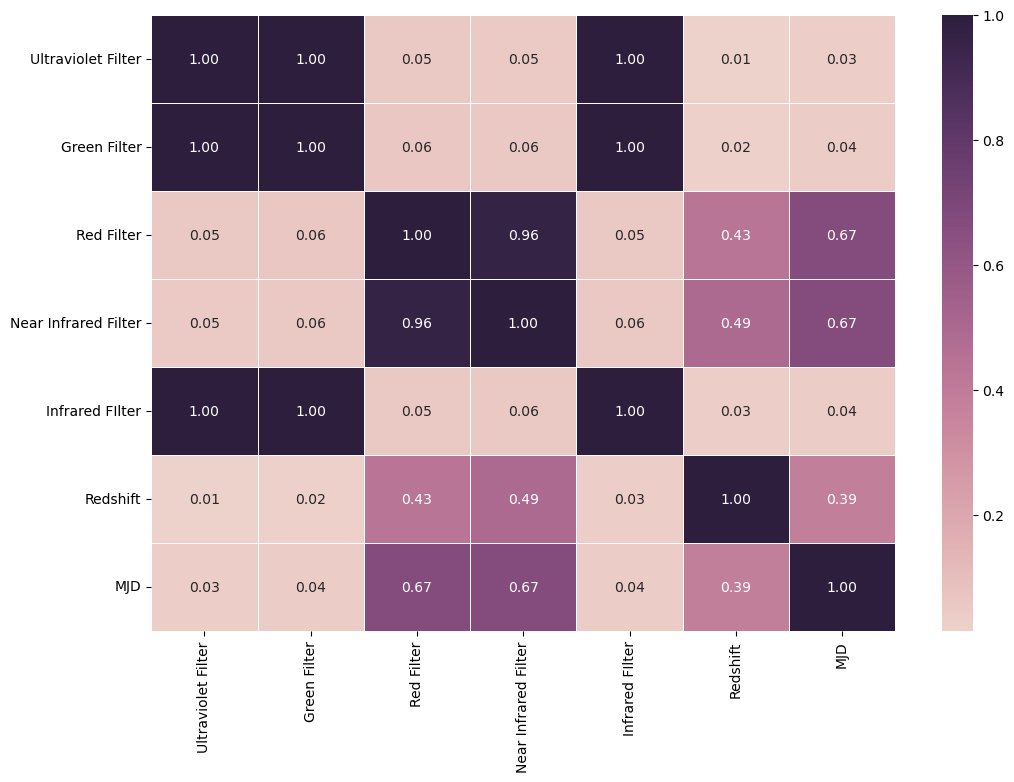

In [65]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dim_stellar.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()



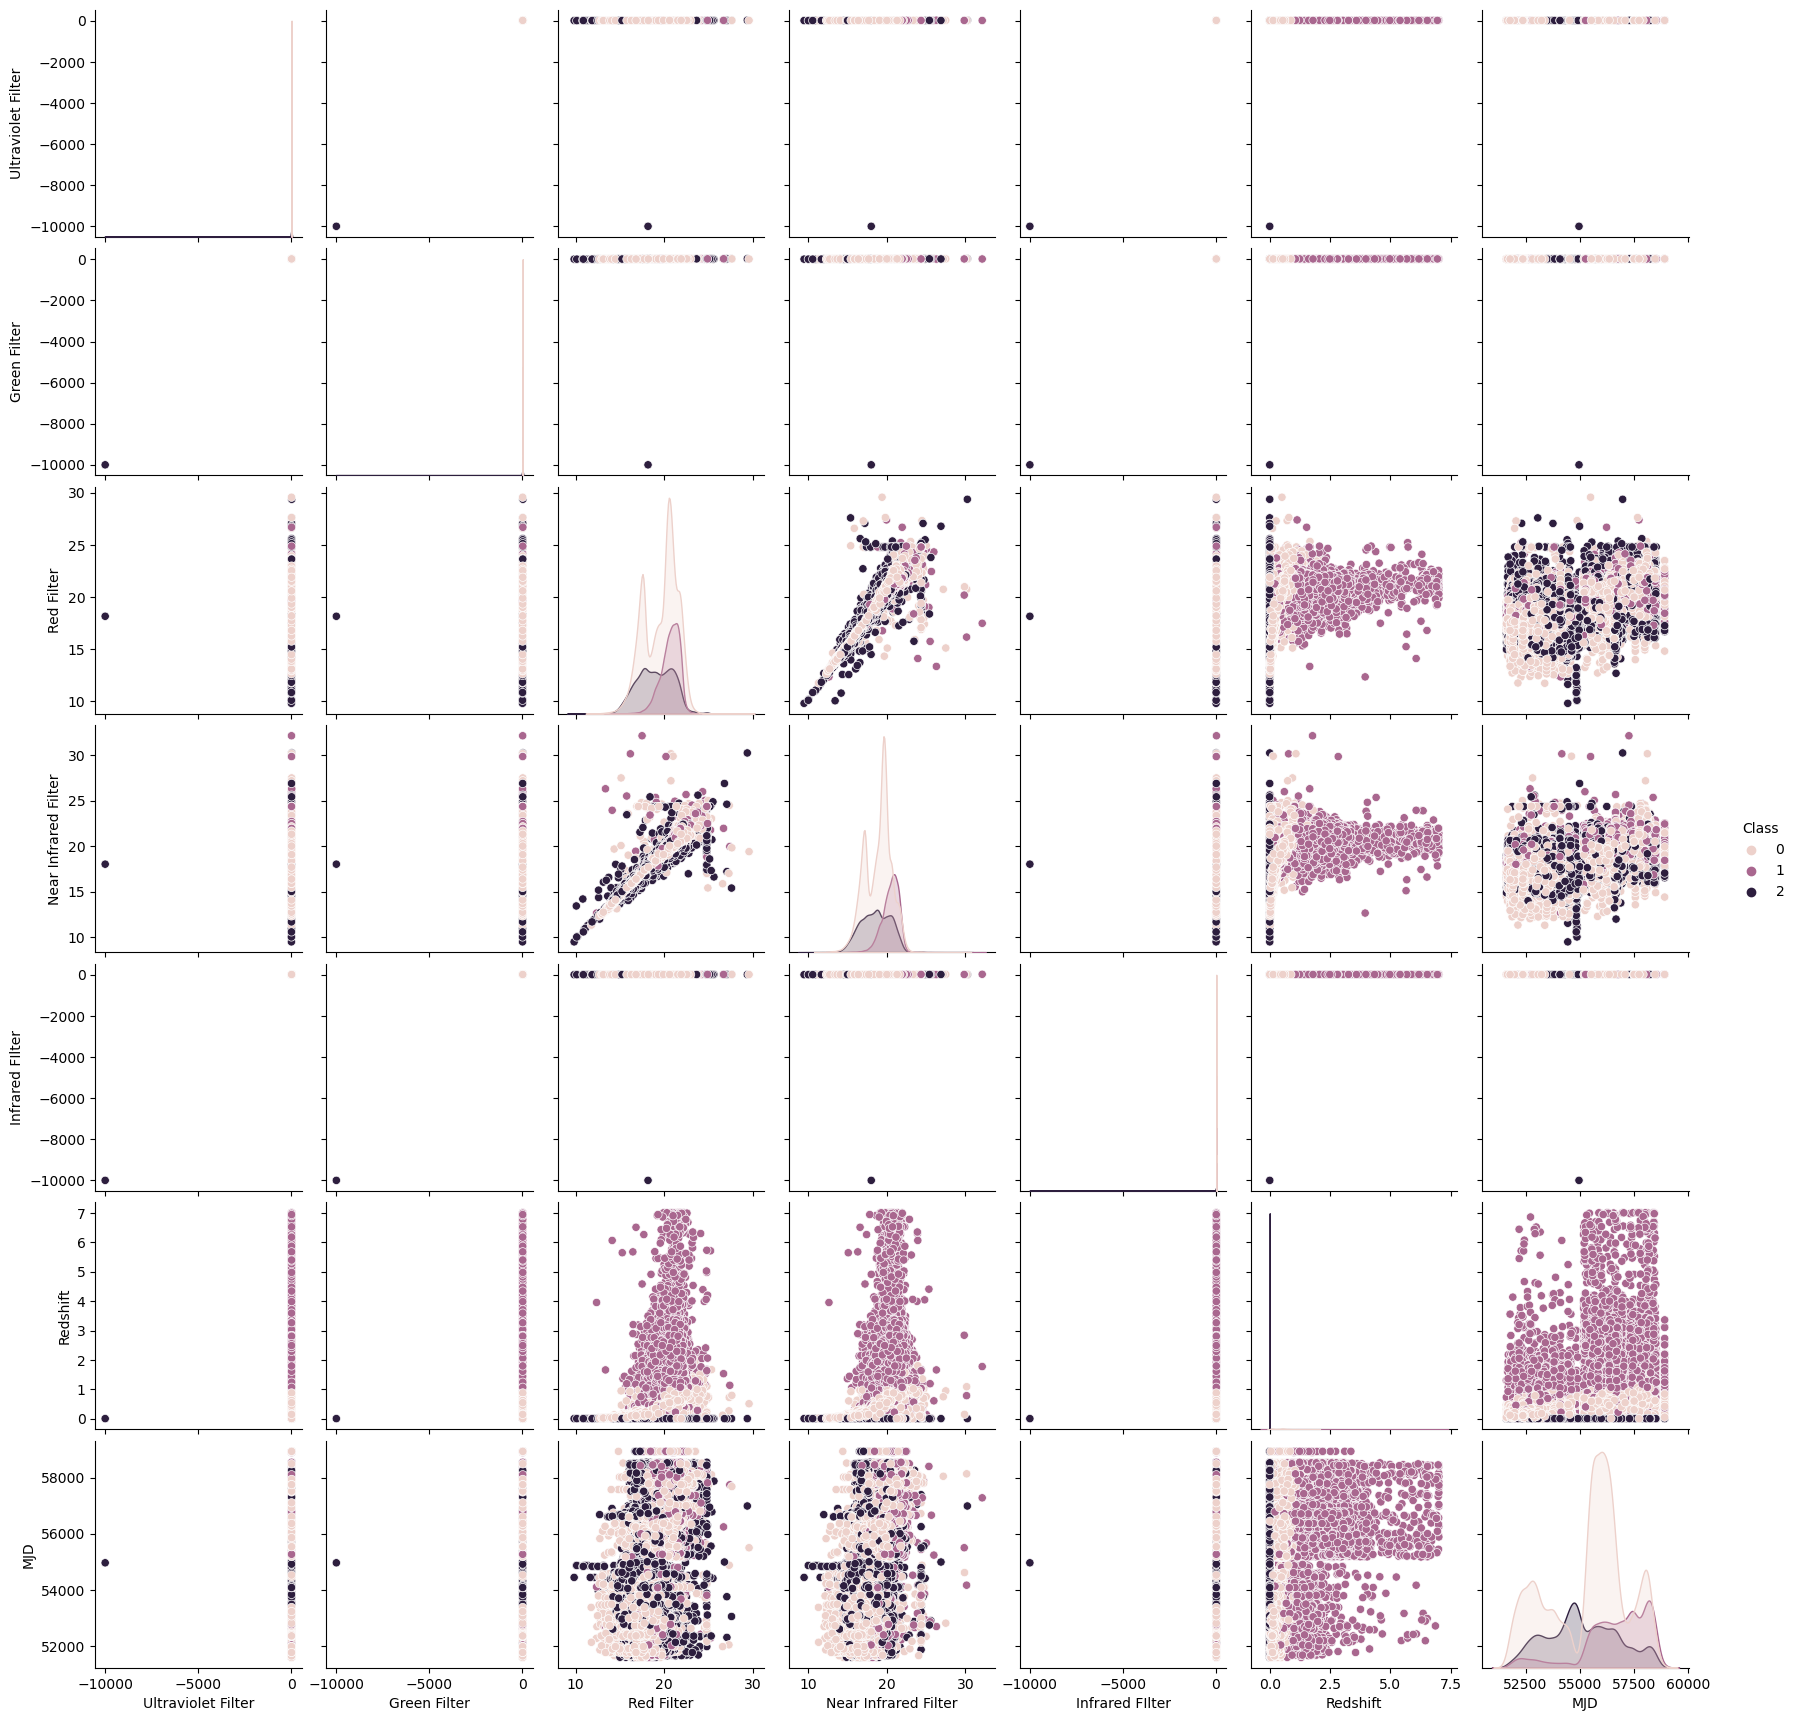

In [152]:
Pair_plot1 = sns.pairplot(dim_stellar, hue = 'Class')

In [153]:
plt.savefig("Pairplot3")

<Figure size 640x480 with 0 Axes>

In [28]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Data Processing

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [69]:
dim_stellar['Class'] = le.fit_transform(dim_stellar['Class'])


In [70]:
dim_stellar['Class'].value_counts()

0    59445
2    21594
1    18961
Name: Class, dtype: int64

In [71]:
#x = dim_stellar(['class'], axis = 1)
#y = dim_stellar.loc[:,'class'].values

In [72]:
d_stellar = dim_stellar.copy()

In [74]:
X1 = d_stellar.drop('Class', axis = 1, inplace = False)
Y = d_stellar['Class']

In [76]:
from collections import Counter

In [77]:
sm = SMOTE(random_state=42)
print('Original dataset size %s' % Counter(Y))
X1, Y = sm.fit_resample(X1, Y)
print('Resampled dataset size %s' % Counter(Y))

Original dataset size Counter({0: 59445, 2: 21594, 1: 18961})
Resampled dataset size Counter({0: 59445, 1: 59445, 2: 59445})


In [78]:
scaler = RobustScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [79]:
print(X1.shape)

(178335, 7)


In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.25, random_state = None) 

# Random Forest Baseline

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
rfc = RandomForestClassifier()
param = {'n_estimators' : [100, 200, 300], 'criterion' : ['gini', 'entropy','log_loss']}

gsearch = GridSearchCV(rfc, param_grid = param, cv = 5, scoring = 'f1_macro', n_jobs = 4)
gsearch.fit(X_train, Y_train)
best_model = gsearch.best_estimator_
print(best_model)

RandomForestClassifier(criterion='entropy')


In [85]:
best_params = gsearch.best_params_
print(best_params)

{'criterion': 'entropy', 'n_estimators': 100}


In [127]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [128]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score 

In [129]:
print("Cross-Validation Score:", cross_val_score(rfc, X_train, Y_train, cv=None, scoring=None))

Cross-Validation Score: [0.98299129 0.98246729 0.98085981 0.98179439 0.98168224]


In [130]:
from sklearn.metrics import precision_recall_fscore_support

In [95]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['Accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['Precision'] = precision
    results_pos['Recall'] = recall
    results_pos['F1 Score'] = f_beta
    return results_pos

In [131]:
y_rfc_pred = rfc.predict(X_test)
evaluate_metrics(Y_test, y_rfc_pred)

{'Accuracy': 0.9822582092230396,
 'Precision': array([0.96812989, 0.98116799, 0.99751811]),
 'Recall': array([0.97885564, 0.96813578, 0.99979831]),
 'F1 Score': array([0.97346322, 0.97460832, 0.99865691])}

In [132]:
target_names = ["0","1","2"]
y_cross_val_pred_rfc = cross_val_predict(rfc,X_train,Y_train, cv=None)
print(classification_report(Y_train, y_cross_val_pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     44642
           1       0.98      0.97      0.97     44538
           2       1.00      1.00      1.00     44571

    accuracy                           0.98    133751
   macro avg       0.98      0.98      0.98    133751
weighted avg       0.98      0.98      0.98    133751



In [110]:
from sklearn.metrics import plot_confusion_matrix

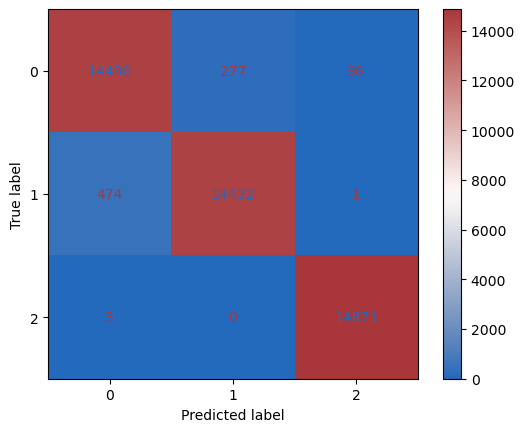

<Figure size 640x480 with 0 Axes>

In [133]:
rfc_matrix = plot_confusion_matrix(rfc,X_test,Y_test,labels=[0,1,2], cmap="vlag")
plt.show()
plt.savefig("rfc_matrix.png")

# PCA Analysis

In [98]:
from sklearn.decomposition import PCA

pca = PCA()
pcomp = pca.fit_transform(X1)
pcomp = pd.DataFrame(pcomp)
print(pcomp.shape)
pcomp.head()

(178335, 7)


,0,1,2,3,4,5,6
0,-0.740445,0.121351,0.459725,0.154924,-0.545373,-0.177598,-0.032789
1,-1.703789,1.396621,0.713702,-0.128384,-0.052852,0.179209,-0.259923
2,-1.108820,0.028688,0.538781,0.554893,-0.632207,-0.029122,-0.027026
3,-0.851509,1.137761,0.525959,-0.205780,-0.297200,-0.792353,0.111512
4,1.829688,-1.505060,-0.107767,-0.837699,-0.696262,-0.044357,0.010125


In [99]:
exp_var_pca = pca.explained_variance_ratio_

In [100]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

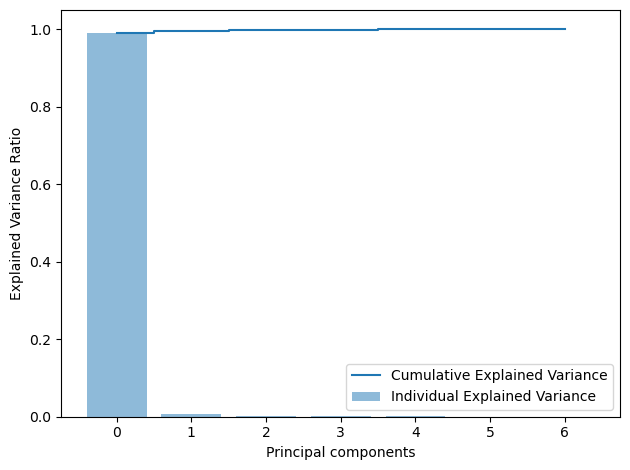

In [101]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Explained Variance')

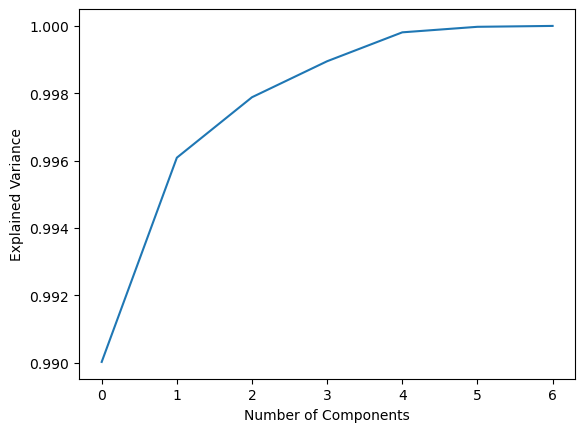

In [103]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

In [104]:
stellar_cov=np.cov(X1.T)

In [105]:
print('Covariance matrix: \n%s' %stellar_cov)

Covariance matrix: 
[[6.46710842e+01 6.91521450e+01 3.66317575e-01 3.06395612e-01
  7.42391179e+01 8.25588785e-02 1.82361699e-01]
 [6.91521450e+01 7.40970832e+01 4.54888828e-01 4.11517401e-01
  7.96133328e+01 1.72894303e-01 2.69941712e-01]
 [3.66317575e-01 4.54888828e-01 4.61511398e-01 4.46337228e-01
  4.46123689e-01 2.23453836e-01 2.91747500e-01]
 [3.06395612e-01 4.11517401e-01 4.46337228e-01 4.66144344e-01
  4.72209546e-01 2.59821606e-01 2.98104748e-01]
 [7.42391179e+01 7.96133328e+01 4.46123689e-01 4.72209546e-01
  8.57830782e+01 2.82920230e-01 3.03817992e-01]
 [8.25588785e-02 1.72894303e-01 2.23453836e-01 2.59821606e-01
  2.82920230e-01 5.65025294e-01 1.98726257e-01]
 [1.82361699e-01 2.69941712e-01 2.91747500e-01 2.98104748e-01
  3.03817992e-01 1.98726257e-01 4.86969489e-01]]


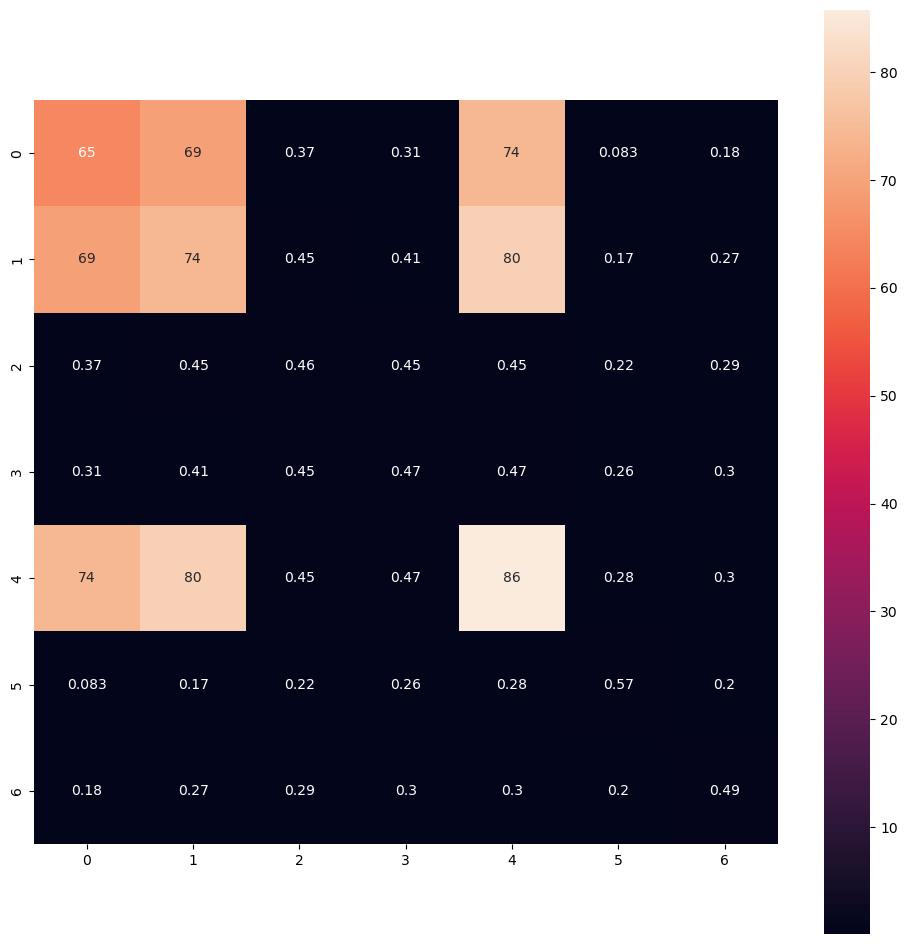

<Figure size 640x480 with 0 Axes>

In [106]:
plt.figure(figsize=(12,12))
#sns.heatmap(stellar_cov, vmax=1, square=True,annot=True,cmap='cubehelix')
sns.heatmap(stellar_cov, square=True,annot=True)
sns.color_palette("Paired", as_cmap=True)
plt.show()
plt.savefig("Covariance_matrix_heatmap.png")

In [107]:
e_vec, e_val = np.linalg.eig(stellar_cov)

print('Eigenvectors \n%s' %e_vec)
print('Eigenvalues \n%s' %e_val)


Eigenvectors 
[2.24271132e+02 1.37358175e+00 4.06638736e-01 2.42111401e-01
 1.94333230e-01 3.71779853e-02 5.92121807e-03]
Eigenvalues 
[[ 0.53647746  0.1003034   0.25105116  0.29138017 -0.52578695 -0.52669906
   0.0183917 ]
 [ 0.57468061 -0.01550833  0.10312298  0.06177659 -0.10630417  0.76320257
  -0.24753234]
 [ 0.00328815 -0.52334813  0.33967814  0.34654997  0.13186952  0.14911864
   0.67155927]
 [ 0.00310589 -0.54455625  0.20210419  0.23859358  0.33416394 -0.22900195
  -0.66450614]
 [ 0.61798682 -0.06461041 -0.31559059 -0.31145258  0.55495825 -0.25209757
   0.21397621]
 [ 0.00143235 -0.448891   -0.78457877  0.20785001 -0.37260768  0.02917769
   0.006444  ]
 [ 0.00197909 -0.46215399  0.23441491 -0.77074843 -0.36929292 -0.03204927
  -0.00136859]]


In [119]:
#setting components to 1

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X1)

X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("Shape:", X_pca.shape)

          0
0 -0.740445
1 -1.703789
2 -1.108820
3 -0.851509
4  1.829688
Shape: (178335, 1)


In [143]:
#Making train_test split using component

X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, 
                                                            test_size=0.25, shuffle=True, 
                                                            random_state=None)

rfc_pca = RandomForestClassifier(n_estimators=100, criterion='entropy')

rfc_pca.fit(X_train_pca, Y_train)

Y_rfc_pca_pred = rfc_pca.predict(X_test_pca)
evaluate_metrics(Y_test, Y_rfc_pca_pred)

{'Accuracy': 0.39868562713080924,
 'Precision': array([0.36247711, 0.42354914, 0.40961435]),
 'Recall': array([0.3588022 , 0.4240043 , 0.41335045]),
 'F1 Score': array([0.36063029, 0.4237766 , 0.41147392])}

In [144]:
target_names = ["0","1","2"]
Y_cross_val_pred_rfc_pca = cross_val_predict(rfc,X_train_pca,Y_train, cv=None)
print(classification_report(Y_train, Y_cross_val_pred_rfc_pca, target_names=target_names))

              precision    recall  f1-score   support

           0       0.37      0.36      0.36     44551
           1       0.42      0.42      0.42     44556
           2       0.40      0.40      0.40     44644

    accuracy                           0.40    133751
   macro avg       0.40      0.40      0.40    133751
weighted avg       0.40      0.40      0.40    133751



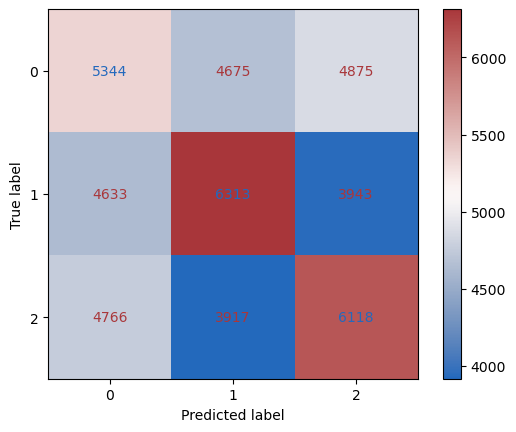

<Figure size 640x480 with 0 Axes>

In [145]:
rfc_matrix = plot_confusion_matrix(rfc_pca,X_test_pca,Y_test,labels=[0,1,2], cmap="vlag")
plt.show()
plt.savefig("rfc_matrix_pca.png")

# Factor Analysis

In [135]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis()
X_fa = fa.fit_transform(X1)

In [139]:
#print("Eigenvalues:", fa.get_eigenvalues()[0])
#print("Communalities:", fa.get_communalities)
#print("Spceific Variance:", fa.get_uniqueness)
#print("Factor Loadings:", fa.loadings_)

AttributeError: 'FactorAnalysis' object has no attribute 'loadings_'

In [140]:
X_train_fa, X_test_fa, Y_train, Y_test = train_test_split(X_fa, Y, 
                                                            test_size=0.25, shuffle=True, 
                                                            random_state=None)
rfc_fa = RandomForestClassifier(n_estimators=100, criterion='entropy')

rfc_fa.fit(X_train_fa, Y_train)

Y_rfc_fa_pred = rfc_fa.predict(X_test_fa)
evaluate_metrics(Y_test, Y_rfc_fa_pred)

{'Accuracy': 0.7110398349183563,
 'Precision': array([0.63819291, 0.86018512, 0.64210953]),
 'Recall': array([0.66558354, 0.83683142, 0.63216328]),
 'F1 Score': array([0.6516005 , 0.84834758, 0.63709758])}

In [141]:
target_names = ["0","1","2"]
Y_cross_val_pred_rfc_fa = cross_val_predict(rfc_fa,X_train_fa,Y_train, cv=None)
print(classification_report(Y_train, Y_cross_val_pred_rfc_fa, target_names=target_names))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65     44673
           1       0.86      0.84      0.85     44675
           2       0.63      0.63      0.63     44403

    accuracy                           0.71    133751
   macro avg       0.71      0.71      0.71    133751
weighted avg       0.71      0.71      0.71    133751



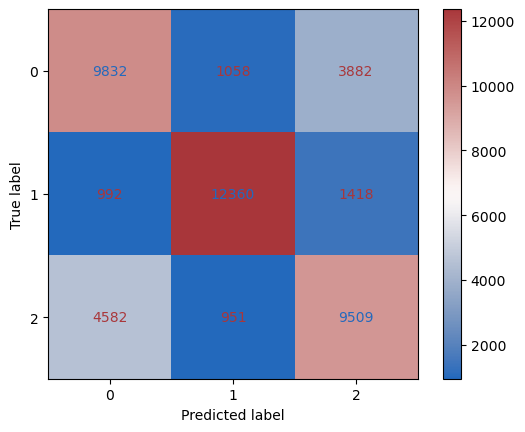

<Figure size 640x480 with 0 Axes>

In [142]:
rfc_matrix = plot_confusion_matrix(rfc_fa,X_test_fa,Y_test,labels=[0,1,2], cmap="vlag")
plt.show()
plt.savefig("rfc_matrix_pca.png")

# TruncatedSVD

In [148]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
X_svd = svd.fit_transform(X1)

In [149]:
X_train_svd, X_test_svd, Y_train, Y_test = train_test_split(X_svd, Y, 
                                                            test_size=0.25, shuffle=True, 
                                                            random_state=None)
rfc_svd = RandomForestClassifier(n_estimators=100, criterion='entropy')

rfc_svd.fit(X_train_svd, Y_train)

Y_rfc_svd_pred = rfc_fa.predict(X_test_fa)
evaluate_metrics(Y_test, Y_rfc_svd_pred)

{'Accuracy': 0.3310380405526646,
 'Precision': array([0.32909256, 0.33168627, 0.33243298]),
 'Recall': array([0.34247501, 0.32180959, 0.32885772]),
 'F1 Score': array([0.33565045, 0.32667329, 0.33063568])}

In [150]:
target_names = ["0","1","2"]
Y_cross_val_pred_rfc_svd = cross_val_predict(rfc_svd,X_train_svd,Y_train, cv=None)
print(classification_report(Y_train, Y_cross_val_pred_rfc_svd, target_names=target_names))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62     44641
           1       0.87      0.85      0.86     44635
           2       0.62      0.63      0.62     44475

    accuracy                           0.70    133751
   macro avg       0.70      0.70      0.70    133751
weighted avg       0.70      0.70      0.70    133751



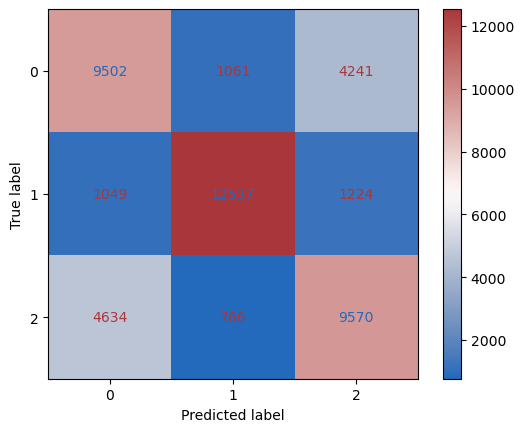

<Figure size 640x480 with 0 Axes>

In [151]:
rfc_matrix = plot_confusion_matrix(rfc_svd,X_test_svd,Y_test,labels=[0,1,2], cmap="vlag")
plt.show()
plt.savefig("rfc_matrix_svd.png")

# Neural Network Classification

    Does the report include a section describing the data?

    Does the report include a paragraph detailing the main objective(s) of this analysis?  

    Does the report include a section with variations of a Deep Learning model and specifies which one is the model that best suits the main objective(s) of this analysis?

    Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?

    Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
#Network architecture

model = Sequential()
model.add(Dense(120, input_shape = (7,), activation = 'sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))